## <font color="#59B4C3">🔨&nbsp;&nbsp;Google Colab Setup</font>
Upload the data (without unzipping it) to your Google Drive to be able to access datasets.

## <font color="#59B4C3">🎯&nbsp;&nbsp;Your task</font>

In this notebook you will explore and analyse the results of different DCGAN models trained by us. You will find questions at the end of this notebook. Please run the code, no model is trained here you will load precomputed models outputs.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip /content/drive/MyDrive/dcgan.zip

Archive:  /content/drive/MyDrive/dcgan.zip
   creating: dcgan/
   creating: dcgan/discriminator_3/
 extracting: dcgan/discriminator_3/fingerprint.pb  
  inflating: dcgan/discriminator_3/keras_metadata.pb  
   creating: dcgan/discriminator_3/variables/
  inflating: dcgan/discriminator_3/variables/variables.data-00000-of-00001  
  inflating: dcgan/discriminator_3/variables/variables.index  
  inflating: dcgan/discriminator_3/saved_model.pb  
   creating: dcgan/discriminator_3/assets/
   creating: dcgan/discriminator_4/
 extracting: dcgan/discriminator_4/fingerprint.pb  
  inflating: dcgan/discriminator_4/keras_metadata.pb  
   creating: dcgan/discriminator_4/variables/
  inflating: dcgan/discriminator_4/variables/variables.data-00000-of-00001  
  inflating: dcgan/discriminator_4/variables/variables.index  
  inflating: dcgan/discriminator_4/saved_model.pb  
   creating: dcgan/discriminator_4/assets/
   creating: dcgan/discriminator_5/
 extracting: dcgan/discriminator_5/fingerprint.pb  
 

## <font color="#59B4C3">🧺&nbsp;&nbsp;Load Experiments Results</font>

In [ ]:
# !pip install tf_keras

In [4]:
import numpy as np
import cv2
from glob import glob
import tf_keras as keras # We need to use tf_keras because the models saved were trained before Keras 3

root_path = '../dcgan'

# Load the generator models we trained
g_models = [keras.models.load_model(f'{root_path}/generator_{model_idx}', compile=False) for model_idx in np.arange(1, 7)]

# Load the discriminator models we trained
d_models = [keras.models.load_model(f'{root_path}/discriminator_{model_idx}', compile=False) for model_idx in np.arange(1, 7)]

# Open generated images for each epochs of each of the models we trained
generated_images = np.stack([
  [
    cv2.imread(f'{root_path}/outputs/dcgan_{gan_idx}/images/{epoch}.png')
    for epoch in np.arange(1, 41)
  ]
  for gan_idx in np.arange(1, 7)
])

# Open loss history images
loss_history_images = [
    cv2.imread(f'{root_path}/outputs/dcgan_{gan_idx}/loss_dcgan_{gan_idx}.png')
    for gan_idx in np.arange(1, 7)
]

/Users/quentinsurdez/Admin/HEIG/BA5/ARN/Lab/ARN/.venv/lib/python3.9/site-packages/tf_keras/src/initializers/initializers.py:121: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
/Users/quentinsurdez/Admin/HEIG/BA5/ARN/Lab/ARN/.venv/lib/python3.9/site-packages/tf_keras/src/initializers/initializers.py:121: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
/Users/quentinsurdez/Admin/HEIG/BA5/ARN/Lab/ARN/.venv/lib/python3.9/site-packages/tf_keras/src/initializers/initializers

## <font color="#59B4C3">🗒&nbsp;&nbsp;Experiments Summary</font>

### Filters

1. Discriminator: 64, 128, 256. Generator: 7x7x256, 256, 1
2. Discriminator: **32**, **64**, **128**. Generator: 7x7x256, 256, 1
3. Discriminator: **8**, **16**, **32**. Generator: 7x7x256, 256, 1
4. Discriminator: 64, 128, 256. Generator: 7x7x256, **512**, 1
5. Discriminator: 64, 128, 256. Generator: 7x7x**128**, **128**, 1
6. \*Discriminator: 64, 128, 256. Generator: 7x7x256, 256, 1

\* The 6th experiment has the same number of filters as the expirement one excepted that the architecture don't follow the guidelines (of having batchnorm, strided convolution & transposed convolutions, ...) so this experiment should be more unstable.

See the model summaries for more details.

In [ ]:
from ipywidgets import interact
import ipywidgets as widgets

def display_summary(experiment):
  print("Generator:\n---------")
  print(g_models[experiment - 1].summary())
  print("\n\nDiscriminator:\n---------")
  print(d_models[experiment - 1].summary())

experiment_dropdown = widgets.Dropdown(
    options=[i for i in np.arange(1, 7)],
    value=1,
    description='Experiment:',
    disabled=False,
)

interact(display_summary, experiment=experiment_dropdown);

## <font color="#59B4C3">🔍&nbsp;&nbsp;Inspect Results</font>

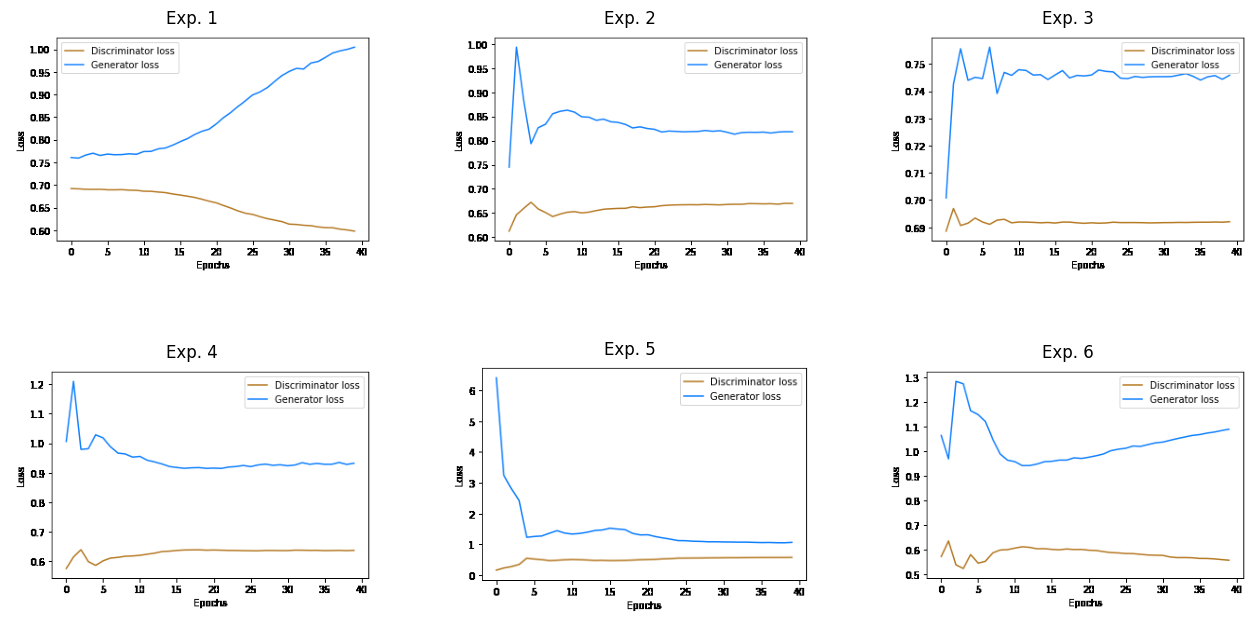

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(16, 8), dpi=100)

for experiment_idx in np.arange(0, 6):
  axs[experiment_idx // 3][experiment_idx % 3].set_title(f"Exp. {experiment_idx + 1}")
  axs[experiment_idx // 3][experiment_idx % 3].axis('Off')
  axs[experiment_idx // 3][experiment_idx % 3].imshow(loss_history_images[experiment_idx])

In [ ]:
def display_epoch_sample_output(experiment, epoch):
  plt.imshow(generated_images[experiment - 1][epoch - 1], cmap="gray")
  plt.axis('off')
  plt.show()

epoch_selection = widgets.BoundedIntText(
    value=1,
    min=1,
    max=40,
    step=1,
    description='Epoch:',
)

experiment_dropdown = widgets.Dropdown(
    options=[i for i in np.arange(1, 7)],
    value=1,
    description='Experiment:',
    disabled=False,
)

interact(display_epoch_sample_output, experiment=experiment_dropdown, epoch=epoch_selection);

interactive(children=(Dropdown(description='Experiment:', options=(1, 2, 3, 4, 5, 6), value=1), BoundedIntText…

### Questions 1.4

<pre>
<font color="#74E291">❓ Can you rely only on the loss of the generator and discriminator to choose the best model?
If no, provide a counter-example.

❓ In the third experiment we significatively reduced the number of parameters of the discriminator
compared to the other experiments. Did it helped the generator to produce better images? Why?

❓ Compare experiments 1 and 6. Remember, They use the same number of filters
but have a different architecture.

❓ In experiment 5, we decrease the number of paramers of the generator. What was the impact?
</pre>